In [1]:
library(performance)
library(ggplot2)
library(dplyr)
library(rstatix)
library(ggpubr)


Warning message:
“package ‘performance’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘rstatix’ was built under R version 4.3.3”

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [2]:
df<-read.csv("../Figure4/10_Isotype_MSD/Isotype_MSD_Processed.csv")

In [3]:
df<-df %>% filter(Isotype %in% c("IgG2","IgG3"),Assay %in% c('Flu B/Washington HA','Flu B/Colorado HA','Flu B/Phuket HA','Flu A/Victoria (H1N1)'))

In [4]:
df_filtered<-df %>%
    group_by(Assay, Isotype, subjectGuid) %>%
    mutate(count = n()) %>%
    filter(count == 2)

In [5]:
df_filtered<-df_filtered %>% mutate(Age_Group=case_when(cohort.cohortGuid=="BR1"~"Young", TRUE ~"Older"))
df_filtered$Age_Group<-factor(df_filtered$Age_Group,levels=c("Young","Older"))

In [6]:
unique(df_filtered$Assay )

[1] "Flu A/Victoria (H1N1)" "Flu B/Washington HA"   "Flu B/Colorado HA"    
[4] "Flu B/Phuket HA"

In [7]:
df_filtered<-df_filtered %>%
  mutate(
    Assay = case_when(
      Assay == "Flu B/Washington HA" ~ "B/Washington HA",
      Assay == 'Flu B/Phuket HA' ~ "B/Phuket HA",
     Assay == 'Flu B/Colorado HA' ~ "B/Colorado HA",
             Assay == 'Flu A/Victoria (H1N1)' ~ "A/Victoria H1N1",


      TRUE ~ Assay  ))

In [9]:

write.csv(df_filtered %>% filter(Isotype=="IgG2") %>% select(subjectGuid,Assay,Age_Group,Isotype,Flu_Day,log.10.Calc..Conc..Mean),
          "/home//workspace/Source_Data/Extended_Fig7a.csv",row.names=FALSE)

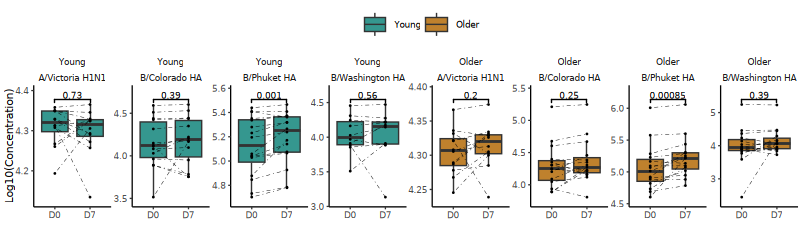

In [8]:
library(ggpubr)


p <- ggplot(
  df_filtered  %>% filter(Isotype=="IgG2") %>% 
    arrange(subjectGuid, Flu_Day),
  aes(
    x    = Flu_Day,                     
    y    = log.10.Calc..Conc..Mean  )
) +
  geom_boxplot(aes(fill = Age_Group),outlier.shape = NA, lwd = 0.3) +
  geom_point(color = "black", size = 0.5, stroke = 0) +
  geom_line(
    aes(group = interaction(Age_Group, subjectGuid)),
    color = "black", linewidth = 0.1, linetype = 4
  ) +
stat_compare_means(
  comparisons = list(c("Day_0", "Day_7")),
  method      = "wilcox.test",
  paired      = TRUE,
    mapping     = aes(label = paste0("p=", after_stat(p.format))),
  hide.ns     = FALSE,  size= 1.75
) +
    scale_x_discrete(labels = c(
        Day_0 = "D0",        Day_7 = "D7"
    )) +
  facet_wrap(~ Age_Group+Assay , ncol = 8, scales = "free_y") +
  scale_fill_manual(values = c(Older = "#bf812d", Young = "#35978f")) +
  scale_y_continuous(  
expand = expansion(mult = c(0.1, 0.15))) +
  xlab("") +
  ylab("Log10(Concentration)") +
  theme_classic(base_size = 6) +
  theme(
    legend.position    = "top",
    legend.title       = element_blank(),
    axis.line          = element_line(colour = "black"),
    panel.grid.major   = element_blank(),
    panel.grid.minor   = element_blank(),
    panel.border       = element_blank(),
    panel.background   = element_blank(),
    strip.background   = element_blank(),
    axis.title.x       = element_text(margin = margin(t = 1))
  )

options(repr.plot.width = 170/25.4, repr.plot.height = 50/25.4)

p
ggsave('FigureA.pdf', p, width = 170/25.4, height = 50/25.4)